### **PREDIÇÃO POR AM - DADOS DO HOSPITAL SÍRIO-LIBANÊS (HSL)**



Data: 22/10/2021

Filipe Loyola Lopes





Informativo: 

GRUPO_0 - pacientes com exames provindos apenas do pronto socorro (NÃO_GRAVE); 

GRUPO_1 - pacientes com exames provindos do pronto socorro e internação (NÃO_GRAVE);

GRUPO_2 - pacientes com exames provindos do pronto socorro e UTI (GRAVE).

GRUPO_3 - pacientes com exames provindos do pronto socorro, internação e UTI (GRAVE).

# **Conjunto 2: APENAS GRUPO 1 (NÃO GRAVE) E GRUPO 3 (GRAVE)**

In [1]:
#Bibliotecas

import numpy as np
import pandas as pd
from pandas import DataFrame
import csv
from numpy import mean
from numpy import std
from numpy import correlate
from numpy.random import randn
from numpy.random import seed
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
from google.colab import files
import datetime as dt
from matplotlib import pyplot as plt
plt.style.use('default')
import seaborn as sns
import warnings
import datetime as dt
from datetime import date

import math
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression, SelectKBest, SelectPercentile

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.pipeline import Pipeline

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import VarianceThreshold, SelectKBest
from sklearn.decomposition import PCA

from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import make_scorer

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **IMPORTAÇÃO DOS DADOS**

In [3]:
df_sirio = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2021 dezembro Artigo/AM/sirio_aprendizado_v3.csv', sep='|', encoding='utf-8')
print(df_sirio.shape)
df_sirio.head(3)

(4320, 33)


,Unnamed: 0,ID_PACIENTE,GRUPO,Idade,Sexo,ALT (TGP),AST (TGO),Basófilos,Basófilos (%),CHCM,Creatinina,Eosinófilos,Eosinófilos (%),Eritrócitos,HCM,Hematócrito,Hemoglobina,Leucócitos,Linfócitos,Linfócitos (%),Monócitos,Monócitos (%),Neutrófilos,Neutrófilos (%),Plaquetas,Potássio,Proteína C-Reativa,RDW,Sódio,Uréia,VCM,Volume plaquetário médio,SEXO
0,0,00017961865C4F766FDBB3CD8FE0BFB0,GRUPO_0,54,M,26.0,24.0,40.0,0.6,34.5,1.02,60.0,0.9,4.65,29.7,40.0,13.8,6440.0,1000.0,15.5,320.0,5.0,5020.0,78.0,176000.0,4.0,0.11,13.1,138.0,35.0,86.0,9.8,1
1,1,000F0BC139D2846DB86AA32B8F05B215,GRUPO_0,41,M,NaN,NaN,20.0,0.4,33.2,1.04,160.0,3.4,4.71,27.6,39.2,13.0,4730.0,2360.0,49.9,420.0,8.9,1770.0,37.4,279000.0,4.3,NaN,14.0,142.0,33.0,83.2,10.0,1
2,2,0028785949D91BD93442838FC898E229,GRUPO_0,31,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [4]:
df_sirio = df_sirio.drop(columns=(['Unnamed: 0', 'Sexo']))
print(df_sirio.shape)
df_sirio.head(1)

(4320, 31)


,ID_PACIENTE,GRUPO,Idade,ALT (TGP),AST (TGO),Basófilos,Basófilos (%),CHCM,Creatinina,Eosinófilos,Eosinófilos (%),Eritrócitos,HCM,Hematócrito,Hemoglobina,Leucócitos,Linfócitos,Linfócitos (%),Monócitos,Monócitos (%),Neutrófilos,Neutrófilos (%),Plaquetas,Potássio,Proteína C-Reativa,RDW,Sódio,Uréia,VCM,Volume plaquetário médio,SEXO
0,00017961865C4F766FDBB3CD8FE0BFB0,GRUPO_0,54,26.0,24.0,40.0,0.6,34.5,1.02,60.0,0.9,4.65,29.7,40.0,13.8,6440.0,1000.0,15.5,320.0,5.0,5020.0,78.0,176000.0,4.0,0.11,13.1,138.0,35.0,86.0,9.8,1


In [5]:
cenario1 = df_sirio

cenario1.drop(cenario1.loc[cenario1['GRUPO']=='GRUPO_0'].index, inplace=True)

cenario1.drop(cenario1.loc[cenario1['GRUPO']=='GRUPO_2'].index, inplace=True)

print('GRUPO_0: ', cenario1[cenario1['GRUPO']=='GRUPO_0'].shape)

print('GRUPO_1: ', cenario1[cenario1['GRUPO']=='GRUPO_1'].shape)

print('GRUPO_2: ', cenario1[cenario1['GRUPO']=='GRUPO_2'].shape)

print('GRUPO_3: ', cenario1[cenario1['GRUPO']=='GRUPO_3'].shape)

GRUPO_0:  (0, 31)
GRUPO_1:  (533, 31)
GRUPO_2:  (0, 31)
GRUPO_3:  (309, 31)


### **CRIANDO COLUNA GRAVIDADE (TARGET)**

GRAVE -> 1

NÃO GRAVE -> 0

*   Item da lista
*   Item da lista



In [6]:
d_2 = {'GRUPO_3' : 1, 'GRUPO_1':0}
cenario1['GRAVIDADE'] = cenario1['GRUPO'].map(d_2) #colocando 0 e 1 na coluna target
cenario1.head(6)

,ID_PACIENTE,GRUPO,Idade,ALT (TGP),AST (TGO),Basófilos,Basófilos (%),CHCM,Creatinina,Eosinófilos,Eosinófilos (%),Eritrócitos,HCM,Hematócrito,Hemoglobina,Leucócitos,Linfócitos,Linfócitos (%),Monócitos,Monócitos (%),Neutrófilos,Neutrófilos (%),Plaquetas,Potássio,Proteína C-Reativa,RDW,Sódio,Uréia,VCM,Volume plaquetário médio,SEXO,GRAVIDADE
5,003F1F4C194763E4A00FD809AF5FA6AA,GRUPO_1,65,79.0,76.0,10.0,0.2,33.4,0.95,10.0,0.2,4.63,30.7,42.5,14.2,5460.0,960.0,17.6,350.0,6.4,4130.0,75.6,212000.0,4.2,14.09,12.9,135.0,25.0,91.8,10.2,1,0
6,004688799FD293C3ABE0A07209FD8B75,GRUPO_3,68,31.0,21.0,30.0,0.4,32.5,2.07,170.0,2.1,4.89,31.5,47.4,15.4,7940.0,1880.0,23.7,400.0,5.0,5460.0,68.8,215000.0,4.8,0.13,13.6,142.0,68.0,96.9,10.4,1,1
11,009F0D6B3BA6C0E2D406585697D679EB,GRUPO_3,56,29.0,32.0,10.0,0.1,34.0,1.29,10.0,0.1,5.18,31.5,47.9,16.3,6930.0,1230.0,17.7,600.0,8.7,5090.0,73.4,145000.0,4.3,3.47,13.2,138.0,42.0,92.5,9.8,1,1
19,010AF0C3418C765CDA28B5957210A819,GRUPO_3,66,121.0,109.0,20.0,0.5,33.7,0.89,0.0,0.0,4.64,29.5,40.7,13.7,3880.0,1170.0,30.2,470.0,12.1,2220.0,57.2,174000.0,4.9,3.65,14.3,137.0,23.0,87.7,10.4,0,1
26,0162D896109ED193BDE84532A63C4CFF,GRUPO_1,63,20.0,14.0,40.0,0.4,32.8,0.65,50.0,0.5,4.78,29.1,42.4,13.9,10270.0,2440.0,23.8,850.0,8.3,6890.0,67.0,329000.0,3.8,0.43,14.8,137.0,37.0,88.7,10.9,0,0
30,01A1C39530DE1A97D9F368049FE20AA3,GRUPO_1,13,16.0,22.0,20.0,0.3,35.7,0.60,200.0,2.9,4.45,27.9,34.7,12.4,6930.0,2930.0,42.3,720.0,10.4,3060.0,44.1,319000.0,4.0,0.05,11.9,142.0,33.0,78.0,9.6,1,0


In [7]:
cenario1 = cenario1.drop(columns=['GRUPO'])

### **SEPARANDO GRUPOS PARA TREINO E GRUPOS PARA TESTE**

In [8]:
#obs: apagar coluna GRAVIDADE depois

X_train, X_test, y_train, y_test = train_test_split(cenario1.drop(['ID_PACIENTE'], axis=1), cenario1['GRAVIDADE'],
                                                    test_size = 0.3, random_state=0)
print('Dados de treino {}'.format(X_train.shape))
print('\n')
print("Dados de teste{}". format(X_test.shape))

Dados de treino (589, 30)


Dados de teste(253, 30)


In [9]:
y_train[y_train == 0].shape

(349,)

In [10]:
y_train[y_train == 1].shape

(240,)

In [11]:
y_test[y_test == 0].shape

(184,)

In [12]:
y_test[y_test == 1].shape

(69,)

In [13]:
X_train.head(20)

,Idade,ALT (TGP),AST (TGO),Basófilos,Basófilos (%),CHCM,Creatinina,Eosinófilos,Eosinófilos (%),Eritrócitos,HCM,Hematócrito,Hemoglobina,Leucócitos,Linfócitos,Linfócitos (%),Monócitos,Monócitos (%),Neutrófilos,Neutrófilos (%),Plaquetas,Potássio,Proteína C-Reativa,RDW,Sódio,Uréia,VCM,Volume plaquetário médio,SEXO,GRAVIDADE
2103,37,216.0,141.0,20.0,0.4,31.5,0.72,30.0,0.7,4.56,26.5,38.4,12.1,4480.0,1150.0,25.7,390.0,8.7,2890.0,64.5,502000.0,4.0,0.10,15.2,139.0,19.0,84.2,9.8,0,0
2127,63,61.0,46.0,10.0,0.2,33.9,1.45,90.0,2.1,5.88,28.2,48.9,16.6,4340.0,1340.0,30.9,640.0,14.7,2260.0,52.1,268000.0,3.6,0.18,13.8,141.0,52.0,83.2,9.1,1,1
762,46,NaN,NaN,20.0,0.3,32.3,0.75,150.0,2.2,4.98,25.5,39.3,12.7,6710.0,1500.0,22.4,530.0,7.9,4510.0,67.2,285000.0,NaN,NaN,12.3,NaN,15.0,78.9,10.9,0,1
839,45,42.0,22.0,50.0,0.5,33.3,0.62,160.0,1.8,4.42,27.6,36.6,12.2,9140.0,2810.0,30.7,340.0,3.7,5780.0,63.3,291000.0,NaN,0.60,14.0,NaN,NaN,82.8,11.6,0,0
3899,64,16.0,15.0,10.0,0.2,32.6,1.03,10.0,0.2,4.45,29.0,39.6,12.9,5080.0,1610.0,31.7,550.0,10.8,2900.0,57.1,155000.0,3.7,0.15,13.7,143.0,45.0,89.0,11.5,1,1
1780,51,94.0,52.0,20.0,0.3,35.3,0.88,90.0,1.5,5.27,30.0,44.8,15.8,5810.0,1130.0,19.4,640.0,11.0,3930.0,67.8,204000.0,3.7,2.45,12.7,136.0,35.0,85.0,9.6,1,0
3127,58,39.0,29.0,40.0,0.7,33.8,1.29,260.0,4.6,5.47,28.9,46.8,15.8,5630.0,1900.0,33.7,440.0,7.8,2990.0,53.2,185000.0,4.2,0.32,12.7,143.0,43.0,85.6,12.7,1,0
3994,62,43.0,42.0,30.0,0.4,36.4,0.75,90.0,1.3,5.14,30.5,43.1,15.7,7070.0,1160.0,16.4,620.0,8.8,5170.0,73.1,230000.0,4.2,0.17,11.6,125.0,19.0,83.9,10.0,0,0
337,39,44.0,37.0,10.0,0.3,33.1,1.32,10.0,0.3,4.90,28.8,42.6,14.1,3310.0,320.0,9.7,350.0,10.6,2620.0,79.1,170000.0,4.1,3.63,13.5,138.0,22.0,86.9,9.6,1,0
1718,84,NaN,NaN,0.0,0.0,34.3,1.09,0.0,0.0,4.78,25.7,35.9,12.3,7080.0,1450.0,20.5,810.0,11.4,4820.0,68.1,202000.0,4.1,NaN,15.5,139.0,57.0,75.1,9.2,0,1


In [14]:
y_train.head(3)

2103    0
2127    1
762     1
Name: GRAVIDADE, dtype: int64

In [15]:
X_test.head(3)

,Idade,ALT (TGP),AST (TGO),Basófilos,Basófilos (%),CHCM,Creatinina,Eosinófilos,Eosinófilos (%),Eritrócitos,HCM,Hematócrito,Hemoglobina,Leucócitos,Linfócitos,Linfócitos (%),Monócitos,Monócitos (%),Neutrófilos,Neutrófilos (%),Plaquetas,Potássio,Proteína C-Reativa,RDW,Sódio,Uréia,VCM,Volume plaquetário médio,SEXO,GRAVIDADE
1922,65,NaN,NaN,10.0,0.2,34.0,0.94,10.0,0.2,4.06,32.8,39.1,13.3,4030.0,1290.0,32.0,440.0,10.9,2280.0,56.7,173000.0,3.6,0.17,12.3,139.0,29.0,96.3,11.2,0,0
3359,46,38.0,29.0,10.0,0.2,32.8,0.85,30.0,0.6,5.61,27.1,46.3,15.2,5050.0,1400.0,27.7,550.0,10.9,3060.0,60.6,253000.0,4.7,1.15,13.0,143.0,22.0,82.5,10.3,1,0
3243,62,23.0,25.0,60.0,1.1,35.1,0.74,190.0,3.5,4.37,32.3,40.2,14.1,5360.0,1970.0,36.8,540.0,10.1,2600.0,48.5,237000.0,4.5,NaN,11.8,139.0,25.0,92.0,9.8,1,0


In [16]:
y_test.head(3)

1922    0
3359    0
3243    0
Name: GRAVIDADE, dtype: int64

In [17]:
X_train.head(20)

,Idade,ALT (TGP),AST (TGO),Basófilos,Basófilos (%),CHCM,Creatinina,Eosinófilos,Eosinófilos (%),Eritrócitos,HCM,Hematócrito,Hemoglobina,Leucócitos,Linfócitos,Linfócitos (%),Monócitos,Monócitos (%),Neutrófilos,Neutrófilos (%),Plaquetas,Potássio,Proteína C-Reativa,RDW,Sódio,Uréia,VCM,Volume plaquetário médio,SEXO,GRAVIDADE
2103,37,216.0,141.0,20.0,0.4,31.5,0.72,30.0,0.7,4.56,26.5,38.4,12.1,4480.0,1150.0,25.7,390.0,8.7,2890.0,64.5,502000.0,4.0,0.10,15.2,139.0,19.0,84.2,9.8,0,0
2127,63,61.0,46.0,10.0,0.2,33.9,1.45,90.0,2.1,5.88,28.2,48.9,16.6,4340.0,1340.0,30.9,640.0,14.7,2260.0,52.1,268000.0,3.6,0.18,13.8,141.0,52.0,83.2,9.1,1,1
762,46,NaN,NaN,20.0,0.3,32.3,0.75,150.0,2.2,4.98,25.5,39.3,12.7,6710.0,1500.0,22.4,530.0,7.9,4510.0,67.2,285000.0,NaN,NaN,12.3,NaN,15.0,78.9,10.9,0,1
839,45,42.0,22.0,50.0,0.5,33.3,0.62,160.0,1.8,4.42,27.6,36.6,12.2,9140.0,2810.0,30.7,340.0,3.7,5780.0,63.3,291000.0,NaN,0.60,14.0,NaN,NaN,82.8,11.6,0,0
3899,64,16.0,15.0,10.0,0.2,32.6,1.03,10.0,0.2,4.45,29.0,39.6,12.9,5080.0,1610.0,31.7,550.0,10.8,2900.0,57.1,155000.0,3.7,0.15,13.7,143.0,45.0,89.0,11.5,1,1
1780,51,94.0,52.0,20.0,0.3,35.3,0.88,90.0,1.5,5.27,30.0,44.8,15.8,5810.0,1130.0,19.4,640.0,11.0,3930.0,67.8,204000.0,3.7,2.45,12.7,136.0,35.0,85.0,9.6,1,0
3127,58,39.0,29.0,40.0,0.7,33.8,1.29,260.0,4.6,5.47,28.9,46.8,15.8,5630.0,1900.0,33.7,440.0,7.8,2990.0,53.2,185000.0,4.2,0.32,12.7,143.0,43.0,85.6,12.7,1,0
3994,62,43.0,42.0,30.0,0.4,36.4,0.75,90.0,1.3,5.14,30.5,43.1,15.7,7070.0,1160.0,16.4,620.0,8.8,5170.0,73.1,230000.0,4.2,0.17,11.6,125.0,19.0,83.9,10.0,0,0
337,39,44.0,37.0,10.0,0.3,33.1,1.32,10.0,0.3,4.90,28.8,42.6,14.1,3310.0,320.0,9.7,350.0,10.6,2620.0,79.1,170000.0,4.1,3.63,13.5,138.0,22.0,86.9,9.6,1,0
1718,84,NaN,NaN,0.0,0.0,34.3,1.09,0.0,0.0,4.78,25.7,35.9,12.3,7080.0,1450.0,20.5,810.0,11.4,4820.0,68.1,202000.0,4.1,NaN,15.5,139.0,57.0,75.1,9.2,0,1


In [18]:
target = X_train['GRAVIDADE']
target

2103    0
2127    1
762     1
839     0
3899    1
       ..
4270    0
861     1
3188    0
2753    1
3433    1
Name: GRAVIDADE, Length: 589, dtype: int64

### **PREPARANDO OS DADOS PARA O APRENDIZADO**

In [19]:
Q1 = X_train.quantile(.25)
Q3 = X_train.quantile(.75)

IIQ = Q3 - Q1
limite_inferior = Q1 - 3*IIQ
limite_superior = Q3 + 3*IIQ

In [20]:
#aplicando o filtro apenas nos dados de treino

selecao = (X_train >= limite_inferior) & (X_train <= limite_superior)

novos_dados = X_train[selecao]

#novos_dados.apply(lambda x: x.fillna(x.median()), axis=0)

In [21]:
novos_dados.head(20)

,Idade,ALT (TGP),AST (TGO),Basófilos,Basófilos (%),CHCM,Creatinina,Eosinófilos,Eosinófilos (%),Eritrócitos,HCM,Hematócrito,Hemoglobina,Leucócitos,Linfócitos,Linfócitos (%),Monócitos,Monócitos (%),Neutrófilos,Neutrófilos (%),Plaquetas,Potássio,Proteína C-Reativa,RDW,Sódio,Uréia,VCM,Volume plaquetário médio,SEXO,GRAVIDADE
2103,37,NaN,NaN,20.0,0.4,31.5,0.72,30.0,0.7,4.56,26.5,38.4,12.1,4480.0,1150.0,25.7,390.0,8.7,2890.0,64.5,502000.0,4.0,0.10,15.2,139.0,19.0,84.2,9.8,0,0
2127,63,61.0,46.0,10.0,0.2,33.9,1.45,90.0,2.1,5.88,28.2,48.9,16.6,4340.0,1340.0,30.9,640.0,14.7,2260.0,52.1,268000.0,3.6,0.18,13.8,141.0,52.0,83.2,9.1,1,1
762,46,NaN,NaN,20.0,0.3,32.3,0.75,150.0,2.2,4.98,25.5,39.3,12.7,6710.0,1500.0,22.4,530.0,7.9,4510.0,67.2,285000.0,NaN,NaN,12.3,NaN,15.0,78.9,10.9,0,1
839,45,42.0,22.0,50.0,0.5,33.3,0.62,160.0,1.8,4.42,27.6,36.6,12.2,9140.0,2810.0,30.7,340.0,3.7,5780.0,63.3,291000.0,NaN,0.60,14.0,NaN,NaN,82.8,11.6,0,0
3899,64,16.0,15.0,10.0,0.2,32.6,1.03,10.0,0.2,4.45,29.0,39.6,12.9,5080.0,1610.0,31.7,550.0,10.8,2900.0,57.1,155000.0,3.7,0.15,13.7,143.0,45.0,89.0,11.5,1,1
1780,51,94.0,52.0,20.0,0.3,35.3,0.88,90.0,1.5,5.27,30.0,44.8,15.8,5810.0,1130.0,19.4,640.0,11.0,3930.0,67.8,204000.0,3.7,2.45,12.7,136.0,35.0,85.0,9.6,1,0
3127,58,39.0,29.0,40.0,0.7,33.8,1.29,260.0,4.6,5.47,28.9,46.8,15.8,5630.0,1900.0,33.7,440.0,7.8,2990.0,53.2,185000.0,4.2,0.32,12.7,143.0,43.0,85.6,12.7,1,0
3994,62,43.0,42.0,30.0,0.4,36.4,0.75,90.0,1.3,5.14,30.5,43.1,15.7,7070.0,1160.0,16.4,620.0,8.8,5170.0,73.1,230000.0,4.2,0.17,11.6,125.0,19.0,83.9,10.0,0,0
337,39,44.0,37.0,10.0,0.3,33.1,1.32,10.0,0.3,4.90,28.8,42.6,14.1,3310.0,320.0,9.7,350.0,10.6,2620.0,79.1,170000.0,4.1,3.63,13.5,138.0,22.0,86.9,9.6,1,0
1718,84,NaN,NaN,0.0,0.0,34.3,1.09,0.0,0.0,4.78,25.7,35.9,12.3,7080.0,1450.0,20.5,810.0,11.4,4820.0,68.1,202000.0,4.1,NaN,15.5,139.0,57.0,75.1,9.2,0,1


In [22]:
novos_dados['GRAVIDADE'] = target

In [23]:
novos_dados.head(20)

,Idade,ALT (TGP),AST (TGO),Basófilos,Basófilos (%),CHCM,Creatinina,Eosinófilos,Eosinófilos (%),Eritrócitos,HCM,Hematócrito,Hemoglobina,Leucócitos,Linfócitos,Linfócitos (%),Monócitos,Monócitos (%),Neutrófilos,Neutrófilos (%),Plaquetas,Potássio,Proteína C-Reativa,RDW,Sódio,Uréia,VCM,Volume plaquetário médio,SEXO,GRAVIDADE
2103,37,NaN,NaN,20.0,0.4,31.5,0.72,30.0,0.7,4.56,26.5,38.4,12.1,4480.0,1150.0,25.7,390.0,8.7,2890.0,64.5,502000.0,4.0,0.10,15.2,139.0,19.0,84.2,9.8,0,0
2127,63,61.0,46.0,10.0,0.2,33.9,1.45,90.0,2.1,5.88,28.2,48.9,16.6,4340.0,1340.0,30.9,640.0,14.7,2260.0,52.1,268000.0,3.6,0.18,13.8,141.0,52.0,83.2,9.1,1,1
762,46,NaN,NaN,20.0,0.3,32.3,0.75,150.0,2.2,4.98,25.5,39.3,12.7,6710.0,1500.0,22.4,530.0,7.9,4510.0,67.2,285000.0,NaN,NaN,12.3,NaN,15.0,78.9,10.9,0,1
839,45,42.0,22.0,50.0,0.5,33.3,0.62,160.0,1.8,4.42,27.6,36.6,12.2,9140.0,2810.0,30.7,340.0,3.7,5780.0,63.3,291000.0,NaN,0.60,14.0,NaN,NaN,82.8,11.6,0,0
3899,64,16.0,15.0,10.0,0.2,32.6,1.03,10.0,0.2,4.45,29.0,39.6,12.9,5080.0,1610.0,31.7,550.0,10.8,2900.0,57.1,155000.0,3.7,0.15,13.7,143.0,45.0,89.0,11.5,1,1
1780,51,94.0,52.0,20.0,0.3,35.3,0.88,90.0,1.5,5.27,30.0,44.8,15.8,5810.0,1130.0,19.4,640.0,11.0,3930.0,67.8,204000.0,3.7,2.45,12.7,136.0,35.0,85.0,9.6,1,0
3127,58,39.0,29.0,40.0,0.7,33.8,1.29,260.0,4.6,5.47,28.9,46.8,15.8,5630.0,1900.0,33.7,440.0,7.8,2990.0,53.2,185000.0,4.2,0.32,12.7,143.0,43.0,85.6,12.7,1,0
3994,62,43.0,42.0,30.0,0.4,36.4,0.75,90.0,1.3,5.14,30.5,43.1,15.7,7070.0,1160.0,16.4,620.0,8.8,5170.0,73.1,230000.0,4.2,0.17,11.6,125.0,19.0,83.9,10.0,0,0
337,39,44.0,37.0,10.0,0.3,33.1,1.32,10.0,0.3,4.90,28.8,42.6,14.1,3310.0,320.0,9.7,350.0,10.6,2620.0,79.1,170000.0,4.1,3.63,13.5,138.0,22.0,86.9,9.6,1,0
1718,84,NaN,NaN,0.0,0.0,34.3,1.09,0.0,0.0,4.78,25.7,35.9,12.3,7080.0,1450.0,20.5,810.0,11.4,4820.0,68.1,202000.0,4.1,NaN,15.5,139.0,57.0,75.1,9.2,0,1


In [24]:
novos_dados[novos_dados['GRAVIDADE']==1]

,Idade,ALT (TGP),AST (TGO),Basófilos,Basófilos (%),CHCM,Creatinina,Eosinófilos,Eosinófilos (%),Eritrócitos,HCM,Hematócrito,Hemoglobina,Leucócitos,Linfócitos,Linfócitos (%),Monócitos,Monócitos (%),Neutrófilos,Neutrófilos (%),Plaquetas,Potássio,Proteína C-Reativa,RDW,Sódio,Uréia,VCM,Volume plaquetário médio,SEXO,GRAVIDADE
2127,63,61.0,46.0,10.0,0.2,33.9,1.45,90.0,2.1,5.88,28.2,48.9,16.6,4340.0,1340.0,30.9,640.0,14.7,2260.0,52.1,268000.0,3.6,0.18,13.8,141.0,52.0,83.2,9.1,1,1
762,46,NaN,NaN,20.0,0.3,32.3,0.75,150.0,2.2,4.98,25.5,39.3,12.7,6710.0,1500.0,22.4,530.0,7.9,4510.0,67.2,285000.0,NaN,NaN,12.3,NaN,15.0,78.9,10.9,0,1
3899,64,16.0,15.0,10.0,0.2,32.6,1.03,10.0,0.2,4.45,29.0,39.6,12.9,5080.0,1610.0,31.7,550.0,10.8,2900.0,57.1,155000.0,3.7,0.15,13.7,143.0,45.0,89.0,11.5,1,1
1718,84,NaN,NaN,0.0,0.0,34.3,1.09,0.0,0.0,4.78,25.7,35.9,12.3,7080.0,1450.0,20.5,810.0,11.4,4820.0,68.1,202000.0,4.1,NaN,15.5,139.0,57.0,75.1,9.2,0,1
2766,80,15.0,19.0,60.0,1.2,32.0,1.22,90.0,1.8,4.75,31.2,46.3,14.8,5110.0,1550.0,30.3,620.0,12.1,2790.0,54.6,230000.0,4.1,0.11,13.1,140.0,37.0,97.5,9.9,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3850,66,27.0,27.0,20.0,0.4,32.8,0.54,40.0,0.8,4.37,30.2,40.2,13.2,4960.0,1000.0,20.2,740.0,14.9,3160.0,63.7,55000.0,3.9,7.29,16.8,136.0,16.0,92.0,10.1,1,1
3685,80,23.0,21.0,50.0,1.5,34.3,0.90,50.0,1.5,3.97,32.0,37.0,12.7,3270.0,790.0,24.2,410.0,12.5,1970.0,60.3,184000.0,4.3,1.81,14.2,137.0,52.0,93.2,9.3,1,1
861,60,NaN,NaN,0.0,0.0,34.4,1.11,0.0,0.0,4.97,30.6,44.2,15.2,6500.0,1070.0,16.5,320.0,4.9,5110.0,78.6,111000.0,NaN,2.06,12.7,NaN,38.0,88.9,11.0,1,1
2753,73,13.0,15.0,10.0,0.3,32.6,0.70,70.0,1.9,4.62,29.9,42.3,13.8,3720.0,1470.0,39.5,630.0,16.9,1540.0,41.4,189000.0,NaN,0.19,13.8,NaN,27.0,91.6,10.5,1,1


### **TRATANDO VALORES AUSENTES**

In [25]:
novos_dados.isnull().sum()

Idade                         0
ALT (TGP)                   184
AST (TGO)                   191
Basófilos                    39
Basófilos (%)                41
CHCM                         40
Creatinina                   86
Eosinófilos                  42
Eosinófilos (%)              45
Eritrócitos                  38
HCM                          42
Hematócrito                  40
Hemoglobina                  35
Leucócitos                   45
Linfócitos                   38
Linfócitos (%)               38
Monócitos                    38
Monócitos (%)                41
Neutrófilos                  50
Neutrófilos (%)              38
Plaquetas                    39
Potássio                    126
Proteína C-Reativa          110
RDW                          46
Sódio                       123
Uréia                       100
VCM                          42
Volume plaquetário médio     46
SEXO                          0
GRAVIDADE                     0
dtype: int64

In [26]:
mediana_NAO_GRAVE = novos_dados[novos_dados['GRAVIDADE']==0].median(skipna=True)
mediana_NAO_GRAVE

Idade                           55.000
ALT (TGP)                       28.000
AST (TGO)                       24.000
Basófilos                       20.000
Basófilos (%)                    0.400
CHCM                            33.700
Creatinina                       0.935
Eosinófilos                     70.000
Eosinófilos (%)                  1.200
Eritrócitos                      4.760
HCM                             29.800
Hematócrito                     41.950
Hemoglobina                     14.050
Leucócitos                    6000.000
Linfócitos                    1475.000
Linfócitos (%)                  26.100
Monócitos                      520.000
Monócitos (%)                    8.600
Neutrófilos                   3590.000
Neutrófilos (%)                 62.250
Plaquetas                   212000.000
Potássio                         4.000
Proteína C-Reativa               0.550
RDW                             13.000
Sódio                          139.000
Uréia                    

In [27]:
mediana_GRAVE = novos_dados[novos_dados['GRAVIDADE']==1].median(skipna=True)
mediana_GRAVE

Idade                           64.00
ALT (TGP)                       27.00
AST (TGO)                       25.00
Basófilos                       30.00
Basófilos (%)                    0.40
CHCM                            33.20
Creatinina                       0.96
Eosinófilos                     80.00
Eosinófilos (%)                  1.20
Eritrócitos                      4.62
HCM                             29.90
Hematócrito                     40.70
Hemoglobina                     13.60
Leucócitos                    6050.00
Linfócitos                    1380.00
Linfócitos (%)                  23.70
Monócitos                      600.00
Monócitos (%)                    9.10
Neutrófilos                   3830.00
Neutrófilos (%)                 63.10
Plaquetas                   215000.00
Potássio                         4.10
Proteína C-Reativa               0.60
RDW                             13.70
Sódio                          139.00
Uréia                           34.00
VCM         

In [28]:
mediana_GRAVE - mediana_NAO_GRAVE

Idade                          9.000
ALT (TGP)                     -1.000
AST (TGO)                      1.000
Basófilos                     10.000
Basófilos (%)                  0.000
CHCM                          -0.500
Creatinina                     0.025
Eosinófilos                   10.000
Eosinófilos (%)                0.000
Eritrócitos                   -0.140
HCM                            0.100
Hematócrito                   -1.250
Hemoglobina                   -0.450
Leucócitos                    50.000
Linfócitos                   -95.000
Linfócitos (%)                -2.400
Monócitos                     80.000
Monócitos (%)                  0.500
Neutrófilos                  240.000
Neutrófilos (%)                0.850
Plaquetas                   3000.000
Potássio                       0.100
Proteína C-Reativa             0.050
RDW                            0.700
Sódio                          0.000
Uréia                          2.000
VCM                            1.000
V

In [29]:
novos_dados.loc[novos_dados['GRAVIDADE']==0] = novos_dados[novos_dados['GRAVIDADE']==0].fillna(mediana_NAO_GRAVE)

novos_dados.head(10)

,Idade,ALT (TGP),AST (TGO),Basófilos,Basófilos (%),CHCM,Creatinina,Eosinófilos,Eosinófilos (%),Eritrócitos,HCM,Hematócrito,Hemoglobina,Leucócitos,Linfócitos,Linfócitos (%),Monócitos,Monócitos (%),Neutrófilos,Neutrófilos (%),Plaquetas,Potássio,Proteína C-Reativa,RDW,Sódio,Uréia,VCM,Volume plaquetário médio,SEXO,GRAVIDADE
2103,37,28.0,24.0,20.0,0.4,31.5,0.72,30.0,0.7,4.56,26.5,38.4,12.1,4480.0,1150.0,25.7,390.0,8.7,2890.0,64.5,502000.0,4.0,0.10,15.2,139.0,19.0,84.2,9.8,0,0
2127,63,61.0,46.0,10.0,0.2,33.9,1.45,90.0,2.1,5.88,28.2,48.9,16.6,4340.0,1340.0,30.9,640.0,14.7,2260.0,52.1,268000.0,3.6,0.18,13.8,141.0,52.0,83.2,9.1,1,1
762,46,NaN,NaN,20.0,0.3,32.3,0.75,150.0,2.2,4.98,25.5,39.3,12.7,6710.0,1500.0,22.4,530.0,7.9,4510.0,67.2,285000.0,NaN,NaN,12.3,NaN,15.0,78.9,10.9,0,1
839,45,42.0,22.0,50.0,0.5,33.3,0.62,160.0,1.8,4.42,27.6,36.6,12.2,9140.0,2810.0,30.7,340.0,3.7,5780.0,63.3,291000.0,4.0,0.60,14.0,139.0,32.0,82.8,11.6,0,0
3899,64,16.0,15.0,10.0,0.2,32.6,1.03,10.0,0.2,4.45,29.0,39.6,12.9,5080.0,1610.0,31.7,550.0,10.8,2900.0,57.1,155000.0,3.7,0.15,13.7,143.0,45.0,89.0,11.5,1,1
1780,51,94.0,52.0,20.0,0.3,35.3,0.88,90.0,1.5,5.27,30.0,44.8,15.8,5810.0,1130.0,19.4,640.0,11.0,3930.0,67.8,204000.0,3.7,2.45,12.7,136.0,35.0,85.0,9.6,1,0
3127,58,39.0,29.0,40.0,0.7,33.8,1.29,260.0,4.6,5.47,28.9,46.8,15.8,5630.0,1900.0,33.7,440.0,7.8,2990.0,53.2,185000.0,4.2,0.32,12.7,143.0,43.0,85.6,12.7,1,0
3994,62,43.0,42.0,30.0,0.4,36.4,0.75,90.0,1.3,5.14,30.5,43.1,15.7,7070.0,1160.0,16.4,620.0,8.8,5170.0,73.1,230000.0,4.2,0.17,11.6,125.0,19.0,83.9,10.0,0,0
337,39,44.0,37.0,10.0,0.3,33.1,1.32,10.0,0.3,4.90,28.8,42.6,14.1,3310.0,320.0,9.7,350.0,10.6,2620.0,79.1,170000.0,4.1,3.63,13.5,138.0,22.0,86.9,9.6,1,0
1718,84,NaN,NaN,0.0,0.0,34.3,1.09,0.0,0.0,4.78,25.7,35.9,12.3,7080.0,1450.0,20.5,810.0,11.4,4820.0,68.1,202000.0,4.1,NaN,15.5,139.0,57.0,75.1,9.2,0,1


In [30]:
print(novos_dados[novos_dados['GRAVIDADE']==0].shape)

(349, 30)


In [31]:
novos_dados.loc[novos_dados['GRAVIDADE']==1] = novos_dados[novos_dados['GRAVIDADE']==1].fillna(mediana_GRAVE)


In [32]:
print(novos_dados[novos_dados['GRAVIDADE']==1].shape)

novos_dados[novos_dados['GRAVIDADE']==1].head()

(240, 30)


,Idade,ALT (TGP),AST (TGO),Basófilos,Basófilos (%),CHCM,Creatinina,Eosinófilos,Eosinófilos (%),Eritrócitos,HCM,Hematócrito,Hemoglobina,Leucócitos,Linfócitos,Linfócitos (%),Monócitos,Monócitos (%),Neutrófilos,Neutrófilos (%),Plaquetas,Potássio,Proteína C-Reativa,RDW,Sódio,Uréia,VCM,Volume plaquetário médio,SEXO,GRAVIDADE
2127,63,61.0,46.0,10.0,0.2,33.9,1.45,90.0,2.1,5.88,28.2,48.9,16.6,4340.0,1340.0,30.9,640.0,14.7,2260.0,52.1,268000.0,3.6,0.18,13.8,141.0,52.0,83.2,9.1,1,1
762,46,27.0,25.0,20.0,0.3,32.3,0.75,150.0,2.2,4.98,25.5,39.3,12.7,6710.0,1500.0,22.4,530.0,7.9,4510.0,67.2,285000.0,4.1,0.60,12.3,139.0,15.0,78.9,10.9,0,1
3899,64,16.0,15.0,10.0,0.2,32.6,1.03,10.0,0.2,4.45,29.0,39.6,12.9,5080.0,1610.0,31.7,550.0,10.8,2900.0,57.1,155000.0,3.7,0.15,13.7,143.0,45.0,89.0,11.5,1,1
1718,84,27.0,25.0,0.0,0.0,34.3,1.09,0.0,0.0,4.78,25.7,35.9,12.3,7080.0,1450.0,20.5,810.0,11.4,4820.0,68.1,202000.0,4.1,0.60,15.5,139.0,57.0,75.1,9.2,0,1
2766,80,15.0,19.0,60.0,1.2,32.0,1.22,90.0,1.8,4.75,31.2,46.3,14.8,5110.0,1550.0,30.3,620.0,12.1,2790.0,54.6,230000.0,4.1,0.11,13.1,140.0,37.0,97.5,9.9,1,1


In [33]:
#verificando valores nulos
novos_dados.isnull().sum()

Idade                       0
ALT (TGP)                   0
AST (TGO)                   0
Basófilos                   0
Basófilos (%)               0
CHCM                        0
Creatinina                  0
Eosinófilos                 0
Eosinófilos (%)             0
Eritrócitos                 0
HCM                         0
Hematócrito                 0
Hemoglobina                 0
Leucócitos                  0
Linfócitos                  0
Linfócitos (%)              0
Monócitos                   0
Monócitos (%)               0
Neutrófilos                 0
Neutrófilos (%)             0
Plaquetas                   0
Potássio                    0
Proteína C-Reativa          0
RDW                         0
Sódio                       0
Uréia                       0
VCM                         0
Volume plaquetário médio    0
SEXO                        0
GRAVIDADE                   0
dtype: int64

In [34]:
# Eliminando coluna target

novos_dados = novos_dados.drop(columns=['GRAVIDADE'])

print(novos_dados.shape)

novos_dados.head(3)

(589, 29)


,Idade,ALT (TGP),AST (TGO),Basófilos,Basófilos (%),CHCM,Creatinina,Eosinófilos,Eosinófilos (%),Eritrócitos,HCM,Hematócrito,Hemoglobina,Leucócitos,Linfócitos,Linfócitos (%),Monócitos,Monócitos (%),Neutrófilos,Neutrófilos (%),Plaquetas,Potássio,Proteína C-Reativa,RDW,Sódio,Uréia,VCM,Volume plaquetário médio,SEXO
2103,37,28.0,24.0,20.0,0.4,31.5,0.72,30.0,0.7,4.56,26.5,38.4,12.1,4480.0,1150.0,25.7,390.0,8.7,2890.0,64.5,502000.0,4.0,0.10,15.2,139.0,19.0,84.2,9.8,0
2127,63,61.0,46.0,10.0,0.2,33.9,1.45,90.0,2.1,5.88,28.2,48.9,16.6,4340.0,1340.0,30.9,640.0,14.7,2260.0,52.1,268000.0,3.6,0.18,13.8,141.0,52.0,83.2,9.1,1
762,46,27.0,25.0,20.0,0.3,32.3,0.75,150.0,2.2,4.98,25.5,39.3,12.7,6710.0,1500.0,22.4,530.0,7.9,4510.0,67.2,285000.0,4.1,0.60,12.3,139.0,15.0,78.9,10.9,0


### **INSERIR FEATURE RAZÃO NEUTROFILOS/LINFÓCITOS**

In [35]:
novos_dados['Razão neut/linf'] = novos_dados['Neutrófilos'] / novos_dados['Linfócitos']

novos_dados.head(10)

,Idade,ALT (TGP),AST (TGO),Basófilos,Basófilos (%),CHCM,Creatinina,Eosinófilos,Eosinófilos (%),Eritrócitos,HCM,Hematócrito,Hemoglobina,Leucócitos,Linfócitos,Linfócitos (%),Monócitos,Monócitos (%),Neutrófilos,Neutrófilos (%),Plaquetas,Potássio,Proteína C-Reativa,RDW,Sódio,Uréia,VCM,Volume plaquetário médio,SEXO,Razão neut/linf
2103,37,28.0,24.0,20.0,0.4,31.5,0.72,30.0,0.7,4.56,26.5,38.4,12.1,4480.0,1150.0,25.7,390.0,8.7,2890.0,64.5,502000.0,4.0,0.10,15.2,139.0,19.0,84.2,9.8,0,2.513043
2127,63,61.0,46.0,10.0,0.2,33.9,1.45,90.0,2.1,5.88,28.2,48.9,16.6,4340.0,1340.0,30.9,640.0,14.7,2260.0,52.1,268000.0,3.6,0.18,13.8,141.0,52.0,83.2,9.1,1,1.686567
762,46,27.0,25.0,20.0,0.3,32.3,0.75,150.0,2.2,4.98,25.5,39.3,12.7,6710.0,1500.0,22.4,530.0,7.9,4510.0,67.2,285000.0,4.1,0.60,12.3,139.0,15.0,78.9,10.9,0,3.006667
839,45,42.0,22.0,50.0,0.5,33.3,0.62,160.0,1.8,4.42,27.6,36.6,12.2,9140.0,2810.0,30.7,340.0,3.7,5780.0,63.3,291000.0,4.0,0.60,14.0,139.0,32.0,82.8,11.6,0,2.056940
3899,64,16.0,15.0,10.0,0.2,32.6,1.03,10.0,0.2,4.45,29.0,39.6,12.9,5080.0,1610.0,31.7,550.0,10.8,2900.0,57.1,155000.0,3.7,0.15,13.7,143.0,45.0,89.0,11.5,1,1.801242
1780,51,94.0,52.0,20.0,0.3,35.3,0.88,90.0,1.5,5.27,30.0,44.8,15.8,5810.0,1130.0,19.4,640.0,11.0,3930.0,67.8,204000.0,3.7,2.45,12.7,136.0,35.0,85.0,9.6,1,3.477876
3127,58,39.0,29.0,40.0,0.7,33.8,1.29,260.0,4.6,5.47,28.9,46.8,15.8,5630.0,1900.0,33.7,440.0,7.8,2990.0,53.2,185000.0,4.2,0.32,12.7,143.0,43.0,85.6,12.7,1,1.573684
3994,62,43.0,42.0,30.0,0.4,36.4,0.75,90.0,1.3,5.14,30.5,43.1,15.7,7070.0,1160.0,16.4,620.0,8.8,5170.0,73.1,230000.0,4.2,0.17,11.6,125.0,19.0,83.9,10.0,0,4.456897
337,39,44.0,37.0,10.0,0.3,33.1,1.32,10.0,0.3,4.90,28.8,42.6,14.1,3310.0,320.0,9.7,350.0,10.6,2620.0,79.1,170000.0,4.1,3.63,13.5,138.0,22.0,86.9,9.6,1,8.187500
1718,84,27.0,25.0,0.0,0.0,34.3,1.09,0.0,0.0,4.78,25.7,35.9,12.3,7080.0,1450.0,20.5,810.0,11.4,4820.0,68.1,202000.0,4.1,0.60,15.5,139.0,57.0,75.1,9.2,0,3.324138


**NORMALIZAÇÃO**

In [36]:
from sklearn import preprocessing

In [37]:
cols = novos_dados.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(novos_dados)
novos_dados = pd.DataFrame(np_scaled, columns = cols)
novos_dados.head(10)

,Idade,ALT (TGP),AST (TGO),Basófilos,Basófilos (%),CHCM,Creatinina,Eosinófilos,Eosinófilos (%),Eritrócitos,HCM,Hematócrito,Hemoglobina,Leucócitos,Linfócitos,Linfócitos (%),Monócitos,Monócitos (%),Neutrófilos,Neutrófilos (%),Plaquetas,Potássio,Proteína C-Reativa,RDW,Sódio,Uréia,VCM,Volume plaquetário médio,SEXO,Razão neut/linf
0,0.291667,0.198276,0.234375,0.153846,0.235294,0.243243,0.201299,0.055556,0.0875,0.588832,0.313433,0.419255,0.408333,0.206897,0.211087,0.440585,0.189024,0.361386,0.198198,0.572000,0.901639,0.516129,0.009150,0.519481,0.636364,0.093750,0.409972,0.375000,0.0,0.088432
1,0.652778,0.482759,0.578125,0.076923,0.117647,0.567568,0.675325,0.166667,0.2625,0.923858,0.440299,0.745342,0.783333,0.197431,0.251599,0.535649,0.341463,0.658416,0.141441,0.406667,0.475410,0.387097,0.019608,0.337662,0.727273,0.609375,0.382271,0.229167,1.0,0.053122
2,0.416667,0.189655,0.250000,0.153846,0.176471,0.351351,0.220779,0.277778,0.2750,0.695431,0.238806,0.447205,0.458333,0.357674,0.285714,0.380256,0.274390,0.321782,0.344144,0.608000,0.506375,0.548387,0.074510,0.142857,0.636364,0.031250,0.263158,0.604167,0.0,0.109520
3,0.402778,0.318966,0.203125,0.384615,0.294118,0.486486,0.136364,0.296296,0.2250,0.553299,0.395522,0.363354,0.416667,0.521974,0.565032,0.531993,0.158537,0.113861,0.458559,0.556000,0.517304,0.516129,0.074510,0.363636,0.636364,0.296875,0.371191,0.750000,0.0,0.068946
4,0.666667,0.094828,0.093750,0.076923,0.117647,0.391892,0.402597,0.018519,0.0250,0.560914,0.500000,0.456522,0.475000,0.247465,0.309168,0.550274,0.286585,0.465347,0.199099,0.473333,0.269581,0.419355,0.015686,0.324675,0.818182,0.500000,0.542936,0.729167,1.0,0.058022
5,0.486111,0.767241,0.671875,0.153846,0.176471,0.756757,0.305195,0.166667,0.1875,0.769036,0.574627,0.618012,0.716667,0.296822,0.206823,0.325411,0.341463,0.475248,0.291892,0.616000,0.358834,0.419355,0.316340,0.194805,0.500000,0.343750,0.432133,0.333333,1.0,0.129652
6,0.583333,0.293103,0.312500,0.307692,0.411765,0.554054,0.571429,0.481481,0.5750,0.819797,0.492537,0.680124,0.716667,0.284652,0.371002,0.586837,0.219512,0.316832,0.207207,0.421333,0.324226,0.580645,0.037908,0.194805,0.818182,0.468750,0.448753,0.979167,1.0,0.048300
7,0.638889,0.327586,0.515625,0.230769,0.235294,0.905405,0.220779,0.166667,0.1625,0.736041,0.611940,0.565217,0.708333,0.382015,0.213220,0.270567,0.329268,0.366337,0.403604,0.686667,0.406193,0.580645,0.018301,0.051948,0.000000,0.093750,0.401662,0.416667,0.0,0.171478
8,0.319444,0.336207,0.437500,0.076923,0.176471,0.459459,0.590909,0.018519,0.0375,0.675127,0.485075,0.549689,0.575000,0.127789,0.034115,0.148080,0.164634,0.455446,0.173874,0.766667,0.296903,0.548387,0.470588,0.298701,0.590909,0.140625,0.484765,0.333333,1.0,0.330859
9,0.944444,0.189655,0.250000,0.000000,0.000000,0.621622,0.441558,0.000000,0.0000,0.644670,0.253731,0.341615,0.425000,0.382691,0.275053,0.345521,0.445122,0.495050,0.372072,0.620000,0.355191,0.548387,0.074510,0.558442,0.636364,0.687500,0.157895,0.250000,0.0,0.123084


In [38]:
X_train = novos_dados

In [39]:
X_train.shape

(589, 30)

### **MUTUAL INFORMATION PARA IDENTIFICAR ATRIBUTOS QUE SE RELACIONAM COM A COLUNA TARGET**

Relação entre as variaveis e a variavel target.
Se X e Y são independentes, então nenhuma informação sobre Y pode ser obtida conhecendo X ou vice-versa.
Portanto sua informação mútua é 0.
Se X é uma função determinística de Y, então podemos determinar X de Y e Y de X com informação mútua 1.
Quanto menor o valor, menos a variavel descreve a relação com o Target!

https://medium.com/@alegeorgelustosa/m%C3%A9todos-para-selecionar-as-melhores-vari%C3%A1veis-do-dataset-em-python-2c374b2e9df2

In [40]:
mi = mutual_info_classif(X_train.fillna(0), y_train)
mi

array([0.04641108, 0.1702319 , 0.14587838, 0.01218071, 0.03539269,
       0.04543124, 0.09649541, 0.00466777, 0.0164931 , 0.07281204,
       0.0493045 , 0.01432357, 0.04960948, 0.02590009, 0.01216848,
       0.03531231, 0.0123247 , 0.05769335, 0.06439354, 0.02507274,
       0.01073642, 0.07723444, 0.0932205 , 0.08085088, 0.        ,
       0.07939089, 0.06840962, 0.03642517, 0.05560936, 0.00583048])

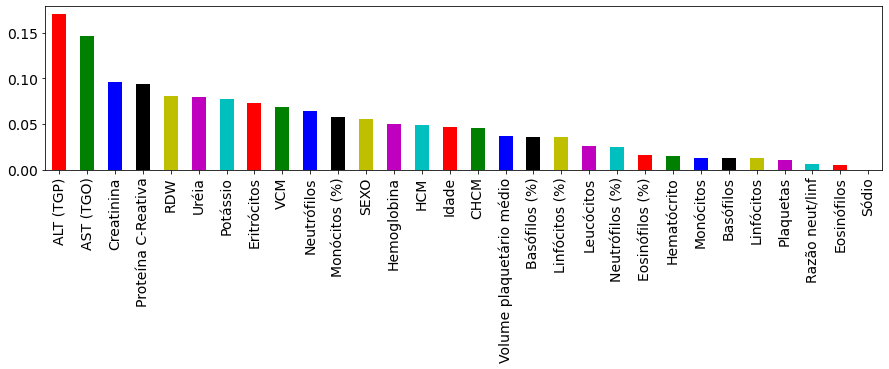

In [41]:
mi = pd.Series(mi)
mi.index = X_train.columns
mi=mi.sort_values(ascending = False)
my_colors = ['r', 'g', 'b', 'k', 'y', 'm', 'c']
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
mi.plot(kind='bar', color=my_colors, figsize=(15,3))
plt.show()

 A incidência de elevação de enzimas hepáticas, principalmente AST e ALT, em pacientes hospitalizados com Covid-19 varia de 14% a 53%, sendo ainda descrita a elevação discreta de bilirrubina total em até 10% dos casos.

FONTE: https://pebmed.com.br/covid-19-como-e-a-relacao-do-novo-coronavirus-com-o-figado/


### **CROSS VALIDATION**

### **AUC TODAS AS VARIÁVEIS**

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
import time
from imblearn.under_sampling import RandomUnderSampler

#faz o balanceamento das classes
under = RandomUnderSampler(sampling_strategy='majority',  )
X_train, y_train = under.fit_resample(X_train, y_train)

seed = 20

scorer = make_scorer(accuracy_score) # Teste outras

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)


gscv = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)

algorithms = {
    # testar sem hiperparâmetros
    'kNN':  GridSearchCV(
        Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', MinMaxScaler(feature_range=(0, 1))),
            ('selector', VarianceThreshold()),
            ('knn', KNeighborsClassifier())]), 
        param_grid={
            'selector__threshold': [0, 0.01, 0.02, 0.03],
            'knn__n_neighbors': [1, 3, 5],
            'knn__p': [1, 2],
        },
        scoring='roc_auc',
        cv=gscv),
    'tree':  GridSearchCV(
        Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('tree', DecisionTreeClassifier(random_state=seed))]), 
        param_grid={
            'tree__max_depth': [5, 10, 20],
            'tree__criterion': ['entropy', 'gini'],
        },
        scoring='roc_auc',
        cv=gscv),
    'bigtree':  GridSearchCV(
        Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('tree', DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=seed))]), 
        param_grid={
            'tree__criterion': ['entropy', 'gini'],
        },
        scoring=scorer,
        cv=gscv),
    'svmlinear': GridSearchCV(
        Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler()),
            ('pca', PCA()),
            ('svm', SVC(kernel='linear', random_state=seed))]), 
        param_grid={
            'pca__n_components': [2, 5, 10],
            'svm__C': [1.0, 2.0],
        },
        scoring='roc_auc',
        cv=gscv),
    'svmrbf': GridSearchCV(
        Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler()),
            ('pca', PCA(random_state=seed)),
            ('svm', SVC(kernel='rbf', random_state=seed))]), 
        param_grid={
            'pca__n_components': [2, 5, 10],
            'svm__C': [1.0, 2.0],
            'svm__gamma': [0.1, 1.0, 2.0],
        },
        scoring='roc_auc',
        cv=gscv),
    'forest': GridSearchCV(  
        Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('rf', RandomForestClassifier(random_state=seed))]),
        param_grid={
            'rf__max_depth': [1, 5, 10],
            'rf__max_features': ["auto", "sqrt","log2"],
            'rf__n_estimators': [1, 100, 500],
        },
        scoring='roc_auc',
        cv=gscv),
}

ini = time.time()

from sklearn.model_selection import cross_val_score

result = {}
for alg, clf in algorithms.items():
  result[alg] = cross_val_score(clf, X_train, y_train, cv=cv)

result = pd.DataFrame.from_dict(result)
print(result)

fim = time.time()
print('\n')
print('Tempo de execução', round((fim - ini)/60, 4), 'minutos')

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


        kNN      tree   bigtree  svmlinear    svmrbf    forest
0  0.648438  0.775174  0.687500   0.682292  0.590278  0.812500
1  0.592014  0.842014  0.562500   0.581597  0.588542  0.788194
2  0.629340  0.723090  0.791667   0.638889  0.517361  0.795139
3  0.753472  0.807292  0.750000   0.788194  0.704861  0.859375
4  0.644097  0.835938  0.729167   0.677083  0.697917  0.795139
5  0.735243  0.759549  0.666667   0.807292  0.821181  0.876736
6  0.687500  0.703125  0.687500   0.692708  0.701389  0.795139
7  0.662326  0.791667  0.729167   0.737847  0.699653  0.848958
8  0.652778  0.759549  0.729167   0.670139  0.519097  0.824653
9  0.659722  0.748264  0.729167   0.659722  0.592014  0.812500


Tempo de execução 18.2355 minutos


In [43]:
#novo
result.apply(lambda x: "{:.2f} ± {:.2f}".format(x.mean(), x.std()))

kNN          0.67 ± 0.05
tree         0.77 ± 0.05
bigtree      0.71 ± 0.06
svmlinear    0.69 ± 0.07
svmrbf       0.64 ± 0.10
forest       0.82 ± 0.03
dtype: object

In [ ]:
#antigo
result.apply(lambda x: "{:.2f} ± {:.2f}".format(x.mean(), x.std()))

kNN          0.67 ± 0.06
tree         0.76 ± 0.05
bigtree      0.67 ± 0.05
svmlinear    0.71 ± 0.07
svmrbf       0.69 ± 0.07
dtype: object

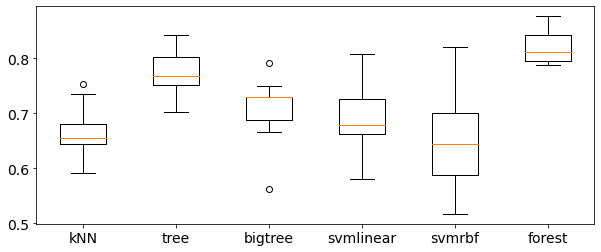

In [46]:
#novo
plt.boxplot([ scores for alg, scores in result.iteritems() ])
plt.xticks(1 + np.arange(result.shape[1]), result.columns)
plt.gcf().set_size_inches(10, 4)
plt.show()